In [1]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import tmdbsimple as tmdb
from imdb import IMDb
import numpy as np
import pandas as pd
import time
import cPickle as pickle
import io

In [2]:
tmdb.API_KEY = 'c12463ab60c8ecbcb76acc7f9f177d19'
imdb_a = IMDb(accessSystem='http')

In [3]:
years = xrange(2010,2016)
pages = xrange(1,2)
year_pagetxt = {}
for year in years: 
    pagestext = {}
    for page in pages: 
        r = requests.get("http://www.boxofficemojo.com/yearly/chart/?page=%s&view=releasedate&view2=domestic&yr=%s&p=.htm"%(page, year))
        pagestext[page] = r.text
#         time.sleep(1) 
    year_pagetxt[year] = pagestext

In [4]:
mojoData = list() 
mojoatt = ['rank', 'title', 'studio', 'gross', 'gross theaters', 'opening', 'opening theaters', 'open', 'close']
for year in years: 
    for page in pages: 
        soup = BeautifulSoup(year_pagetxt[year][page], "html.parser")
        rows = soup.find_all("font", attrs={'size':'2'})
        start = 10         
        for i in range(start,len(rows)-2, 9):
            t = rows[i].get_text()
            if unicode('Summary of') in t: 
                break
            movie_item = dict() 
            movie_item['year'] = year            
            for at in range(9):
                t = rows[i + at].get_text()
                movie_item[mojoatt[at]] = t
            mojoData.append(movie_item)

In [5]:
# remove movie year in title
for movie in mojoData:
    year = ' (' + str(movie['year']) +')'
    if movie['title'][-7:] == year:
        movie['title'] = movie['title'][:-7]

In [6]:
len(mojoData)

600

In [7]:
search = tmdb.Search()

In [8]:
ListMovieWY = list()
for movie in mojoData:
    q = movie['title']
    response = search.movie(query=q)    
    for s in search.results:
        if s['release_date'].split('-')[0] == str(movie['year']):
            movie['tmdb_id'] = s['id']
            continue
    if 'tmdb_id' not in movie:
        ListMovieWY.append(movie['title'])

In [9]:
# remove movie not found in themoviedb.org 
# wrong release date
mojoDatar = [movie for movie in mojoData if 'tmdb_id' in movie]

In [10]:
len(mojoDatar)

581

In [12]:
MovieDict = dict()
ErrorMovieList = list()
count = 0
for movie in mojoDatar:
    count += 1
    print count
    try:
        moviet = tmdb.Movies(movie['tmdb_id'])
        movieID = moviet.id
        response = moviet.info()
        moviei = imdb_a.get_movie(moviet.imdb_id[2:])
        MovieDict[movieID] = dict()
        MovieDict[movieID]['id'] = movieID
        MovieDict[movieID]['name'] = moviet.title
        MovieDict[movieID]['imdb_id'] = moviet.imdb_id
        MovieDict[movieID]['budget'] = moviet.budget
        MovieDict[movieID]['gross'] = int(movie['gross'][1:].replace(',',''))
        MovieDict[movieID]['opening_gross'] = int(movie['opening'][1:].replace(',',''))
        MovieDict[movieID]['runtime'] = moviet.runtime
        if 'mpaa' in moviei.keys():
            MovieDict[movieID]['mpaa'] = moviei['mpaa']
        else:
            MovieDict[movieID]['mpaa'] = None
            
        if 'rating' in moviei.keys():
            MovieDict[movieID]['imdb_rating'] = moviei['rating']
        else:
            MovieDict[movieID]['imdb_rating'] = None
            
        MovieDict[movieID]['opening_theathers'] = int(movie['opening theaters'].replace(',',''))
        MovieDict[movieID]['year'] = movie['year']
        
        if 'genres' in moviei.keys():
            MovieDict[movieID]['genres'] = moviei['genres']
        else:
            MovieDict[movieID]['genres'] = None
            
        if 'director' in moviei.keys():
            directors = list()
            for u in moviei['director']:
                directors.append(u.personID)
            MovieDict[movieID]['director'] = directors
        else:
            MovieDict[movieID]['director'] = None
            
        if 'cast' in moviei.keys():
            casts = list()
            for u in moviei['cast']:
                casts.append(u.personID)
            MovieDict[movieID]['cast'] = casts
        else:
            MovieDict[movieID]['cast'] = None
            
    except:
        ErrorMovieList.append(movie['tmdb_id'])
        print movie['title']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


2017-04-28 12:16:35,582 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Red
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


2017-04-28 12:22:13,574 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Edge of Darkness
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96


2017-04-28 12:25:37,561 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The Switch
97
98
99
100
101
102
103
104
105
106
107


2017-04-28 12:27:02,160 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Thor
108
109
110
111
112
113
114
115
116
117
118


2017-04-28 12:28:22,729 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Super 8
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133


2017-04-28 12:29:59,109 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Battle: Los Angeles
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


2017-04-28 12:37:01,556 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Drive
188


2017-04-28 12:37:02,774 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


50/50
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
The Campaign
230
231
232
233
234
235
236
237
238
Contraband
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267


2017-04-28 12:47:00,907 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The Three Stooges
268
269


2017-04-28 12:47:06,243 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The Cabin in the Woods
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321


2017-04-28 12:52:50,354 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Pacific Rim
322


2017-04-28 12:52:51,385 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


This is the End
323
324
325
326


2017-04-28 12:53:11,753 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Planes
327
328


2017-04-28 12:53:26,546 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Oblivion
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366


2017-04-28 12:56:24,104 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The Family
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383


2017-04-28 12:57:42,696 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The World's End
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
Lucy
410
411
412
413
414
415
416
417


2017-04-28 13:01:54,165 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Noah
418
419
Non-Stop
420
421
422
423
424
425
426
427
428


2017-04-28 13:02:55,985 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Penguins of Madagascar
429
430


2017-04-28 13:03:16,872 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The Monuments Men
431
432
433
434
435
436
437
438
439
440


2017-04-28 13:04:18,240 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Planes: Fire & Rescue
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465


2017-04-28 13:06:54,773 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


The Expendables 3
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
Star Wars: The Force Awakens
486
487
488
489
490


2017-04-28 13:09:51,662 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Minions
491
492
493
494
495
496
497
498


2017-04-28 13:10:47,506 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Ant-Man
499


2017-04-28 13:10:48,620 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Home
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514


2017-04-28 13:12:26,577 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Tomorrowland
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532


2017-04-28 13:14:25,258 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Black Mass
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
Everest
549
550
Krampus
551
552
553


2017-04-28 13:16:39,190 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


Brooklyn
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571


2017-04-28 13:18:24,057 CRITICAL [imdbpy] /home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/_exceptions.py:35: IMDbParserError exception raised; args: (u'invalid movieID "": invalid literal for int() with base 10: \'\'',); kwds: {}
Traceback (most recent call last):
  File "/home/yoh/anaconda2/envs/ds_project/lib/python2.7/site-packages/imdb/parser/http/__init__.py", line 344, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: ''


No Escape
572
573
574
575
576
Ex Machina
577
578
579
580
581


In [14]:
pickle.dump(MovieDict, io.open('MovieData100.pkl', 'wb'))

In [15]:
MovieTable1 = pd.read_pickle('MovieData100_10_15.pkl')

In [20]:
MDdf = pd.DataFrame(MovieTable1).transpose()

In [21]:
MDdf.head()

,budget,cast,director,genres,gross,id,imdb_id,imdb_rating,mpaa,name,opening_gross,opening_theathers,runtime,year
1865,380000000,"[0000136, 0004851, 0001691, 0574534, 0573618, ...",[0551128],"[Action, Adventure, Fantasy]",241071802,1865,tt1298650,6.7,"Rated PG-13 for sexual content/nudity, languag...",Pirates of the Caribbean: On Stranger Tides,90151958,4155,136,2011
1930,215000000,"[1940449, 1297015, 0406975, 0001459, 0000640, ...",[1989536],"[Action, Adventure]",262030663,1930,tt0948470,7,Rated PG-13 for sequences of action and violence,The Amazing Spider-Man,62004688,4318,136,2012
4258,20000000,"[0864308, 0005350, 3856188, 4795991, 5777210, ...","[0002700, 0001878]",[Comedy],32015787,4258,tt0795461,3.5,Rated PG-13 for crude and sexual content throu...,Scary Movie 5,14157367,3402,86,2013
7978,150000000,"[0581163, 2247629, 1289434, 0001125, 3785649, ...",[0002653],"[Drama, Fantasy, Horror, Thriller]",61979680,7978,tt0780653,5.8,Rated R for bloody horror violence and gore,The Wolfman,31479235,3222,102,2010
9543,150000000,"[0350453, 2605345, 0001426, 0000547, 0869750, ...",[0001565],"[Action, Adventure, Fantasy, Romance]",90759676,9543,tt0473075,6.6,Rated PG-13 for intense sequences of violence ...,Prince of Persia: The Sands of Time,30095259,3646,116,2010


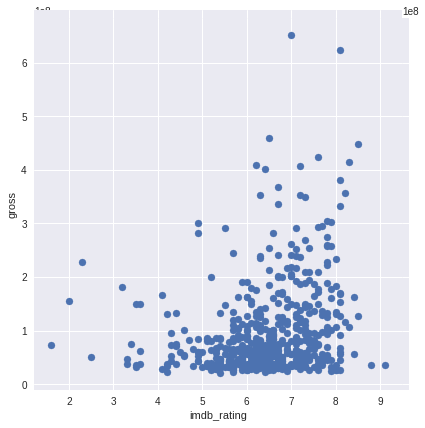

In [45]:
MD_rate_gross = MDdf[['gross', 'imdb_rating']]
MD_rate_gross = MD_rate_gross[MD_rate_gross.imdb_rating.notnull()]
grid = sns.JointGrid(MD_rate_gross.imdb_rating, MD_rate_gross.gross, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter)

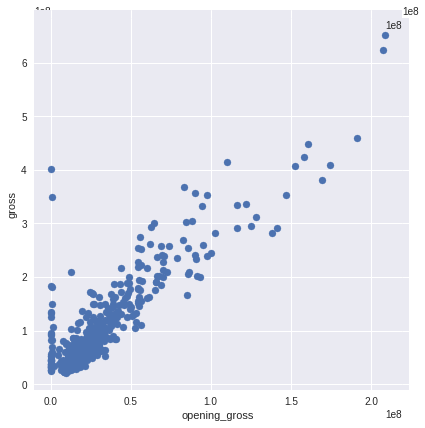

In [44]:
MD_opening_gross = MDdf[['gross', 'opening_gross']]
grid = sns.JointGrid(MD_opening_gross.opening_gross, MD_opening_gross.gross, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter)

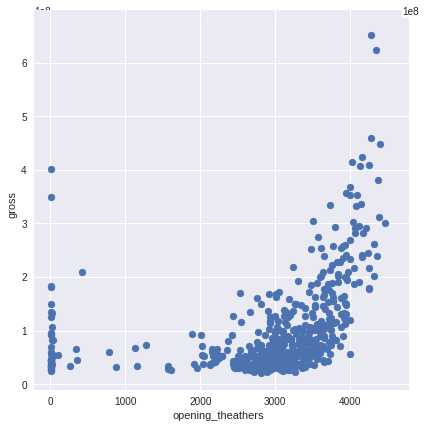

In [47]:
MD_theather_gross = MDdf[['opening_theathers', 'gross']]
grid = sns.JointGrid(MD_theather_gross.opening_theathers, MD_theather_gross.gross, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter)

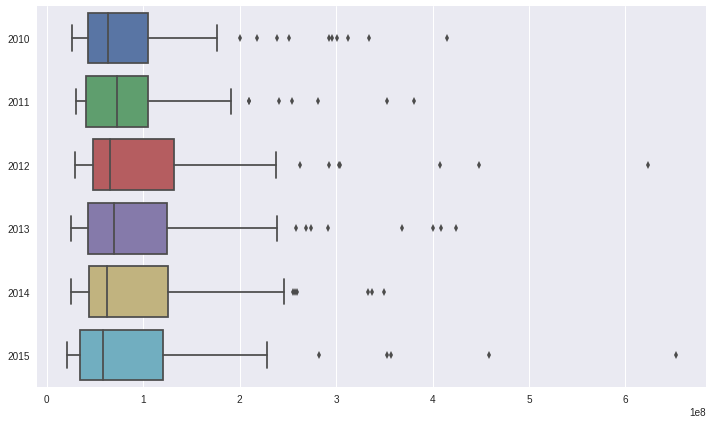

In [142]:
MD_year_gross = MDdf[['year', 'gross']]
dd = dict()
for y in MD_year_gross.year.unique():
    dd[y] = MD_year_gross[MD_year_gross.year == y].gross
dd = pd.DataFrame(dd)
plt.figure(figsize=(12, 7))
sns.boxplot(dd,orient="h")

In [119]:
MD_genre_gross = MDdf[['genres', 'gross']]

In [105]:
genres_list = list()
for gl in MD_genre_gross.genres.get_values():
    if gl == None:
        continue
    for g in gl:
        if g not in genres_list:
            genres_list.append(g)

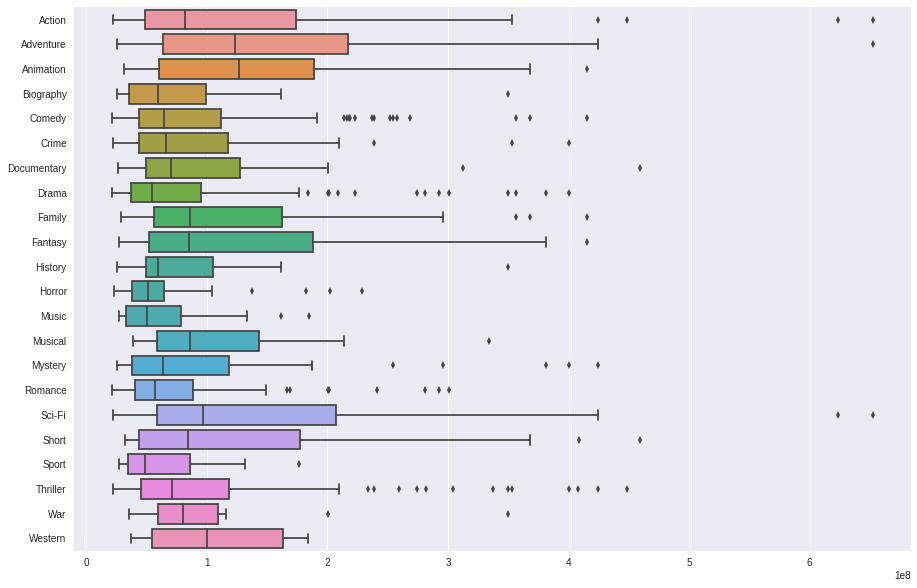

In [139]:
dd = dict()
for g in genres_list:
    tl = list()
    for gg in MD_genre_gross.genres:
        if gg == None:
            tl.append(False)
        else:
            tl.append(g in gg)
    dd[g] = MD_genre_gross[tl].gross
dd = pd.DataFrame(dd)
plt.figure(figsize=(15, 10))
sns.boxplot(dd,orient="h")

In [138]:
plt.figure(figsize=(15, 10))

In [137]:
plt.show()